### Ejemplo de clase 17
Video en https://udbedu.sharepoint.com/:v:/s/AMN012024/EZtHJ3k2dtlAu_VOZTM_IWoBXWDDW3ssj8FxXs99Yy5G7A?e=ToS9nF

Enunciado:

Tenemos las ecuaciaciones diferenciales:
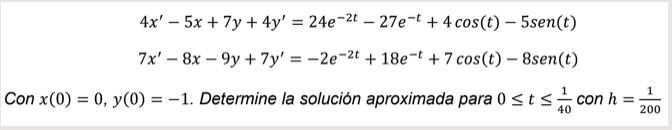

Con esto pasamos a Python a declarar todos los datos para resolever

In [20]:
from sympy import *

# Declaramos las variable a utilizar
x, y, t= symbols("x y t")

h= 1/200

# Ingresamos nuestras funciones A y B
A = 24*exp(-2*t)- 27*exp(-t) + 4 * cos(t) - 5*sin(t)
B = -2*exp(-2*t) + 18*exp(-t) + 7 * cos(t) - 8*sin(t)

# Ahora pasamos el despeje de Dx y Dy en dos funcios F y G
f = (70*A.diff() - 9*A - 4*B.diff() - 7*B - 101*x) / -88
g = (7*A.diff() - 8*A - 4*B.diff() + 5*B + 101*y) / 88

display(f)
display(g)

101*x/88 + 151*sin(t)/88 + 403*cos(t)/88 - 189*exp(-t)/8 + 1789*exp(-2*t)/44

101*y/88 + 567*exp(-t)/88 - 277*exp(-2*t)/44

In [21]:
from numpy import arange
# creamos nuestro intervalo
T = [t for t in arange(start=0, stop=0.025 + h/2,step=h)]
T

[0.0, 0.005, 0.01, 0.015, 0.02, 0.025]

In [22]:
# Ahora vamos a generar todas nuestras K y T

# Declaro la lista con x(0) = 0, y(0)=-1

X = [0]
Y = [-1]
K11 = [0]
K12 = [0]
K21 = [0]
K22 = [0]
K31 = [0]
K32 = [0]
K41 = [0]
K42 = [0]

# Hago un for para aplicar la fórmula
for i in range(1, len(T)):
    k11 = f.subs({t: T[i-1], x: X[i-1]})
    k12 = g.subs({t: T[i-1], y: Y[i-1]})
    k21 = f.subs({t: T[i-1] + 0.5*h, x: X[i-1] + (k11*h)/2})
    k22 = g.subs({t: T[i-1] + 0.5*h, y: Y[i-1] + (k12*h)/2})
    k31 = f.subs({t: T[i-1] + 0.5*h, x: X[i-1] + (k21*h)/2})
    k32 = g.subs({t: T[i-1] + 0.5*h, y: Y[i-1] + (k22*h)/2})
    k41 = f.subs({t: T[i-1] + h, x: X[i-1] + k31*h})
    k42 = g.subs({t: T[i-1] + h, y: Y[i-1] + k32*h})
    K11.append(k11)
    K12.append(k12)
    K21.append(k21)
    K22.append(k22)
    K31.append(k31)
    K32.append(k32)
    K41.append(k41)
    K42.append(k42)
    X.append(float(X[i-1] + (h/6)*(k11+2*k21+2*k31+k41)))
    Y.append(float(Y[i-1] + (h/6)*(k12+2*k22+2*k32+k42)))


display(X)
display(Y)

[0,
 0.10768059831242002,
 0.2145941918496394,
 0.3207529360095602,
 0.4261688699129971,
 0.5308539176642959]

[-1,
 -1.0049377700803874,
 -1.0097521546353427,
 -1.0144447517141897,
 -1.0190171416183025,
 -1.0234708870869142]

In [23]:
# Desplegamos en una tabla los resultados de las aproximaciones y las K
from utils import imprimir_tabla

# Primero una lista para los datos principales
lista_aproximaciones = [["ti", "Yi", "Xi"]]

for i in range(len(T)):
    lista_aproximaciones.append(
        [
            str(float(T[i])),
            str(float(X[i])),
            str(float(Y[i]))
        ]
    )

# Ahora una lista de las K de x
lista_k1 = [["k11", "k21", "k31", "k41"]]

for i in range(len(T)):
    lista_k1.append(
        [
            str(float(K11[i])),
            str(float(K21[i])),
            str(float(K31[i])),
            str(float(K41[i]))
        ]
    )

# Finalmente una lista de las K de y
lista_k2 = [["k12", "k22", "k32", "k42"]]

for i in range(len(T)):
    lista_k2.append(
        [
            str(float(K12[i])),
            str(float(K22[i])),
            str(float(K32[i])),
            str(float(K42[i]))
        ]
    )

print("Tabla de aproximaciones")
imprimir_tabla(lista_aproximaciones)

print("Tabla de k para x")
imprimir_tabla(lista_k1)

print("Tabla de k para y")
imprimir_tabla(lista_k2)

Tabla de aproximaciones


┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃ ti    ┃ Yi                  ┃ Xi                  ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ 0.0   │ 0.0                 │ -1.0                │
│ 0.005 │ 0.10768059831242002 │ -1.0049377700803874 │
│ 0.01  │ 0.2145941918496394  │ -1.0097521546353427 │
│ 0.015 │ 0.3207529360095602  │ -1.0144447517141897 │
│ 0.02  │ 0.4261688699129971  │ -1.0190171416183025 │
│ 0.025 │ 0.5308539176642959  │ -1.0234708870869142 │
└───────┴─────────────────────┴─────────────────────┘

Tabla de k para x


┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃ k11                ┃ k21                ┃ k31                ┃ k41                ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ 0.0                │ 0.0                │ 0.0                │ 0.0                │
│ 21.613636363636363 │ 21.536128892060713 │ 21.535906498463294 │ 21.459010830219615 │
│ 21.459012053490415 │ 21.382727158690933 │ 21.382508273055286 │ 21.306829327680365 │
│ 21.3068305352868   │ 21.23175651112792  │ 21.231541099865417 │ 21.15706723463145  │
│ 21.157068426730543 │ 21.083193693874094 │ 21.082981723759932 │ 21.00970142212564  │
│ 21.00970259887278  │ 20.9370157035563   │ 20.936807141725986 │ 20.864709012121192 │
└────────────────────┴────────────────────┴────────────────────┴────────────────────┘

Tabla de k para y


┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃ k12                 ┃ k22                 ┃ k32                 ┃ k42                 ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ 0.0                 │ 0.0                 │ 0.0                 │ 0.0                 │
│ -1.0                │ -0.9875584440157521 │ -0.9875227452329567 │ -0.9751617179673968 │
│ -0.9751618974194023 │ -0.962881256987077  │ -0.9628460199222004 │ -0.9506450147084542 │
│ -0.9506451919810652 │ -0.9385236808273909 │ -0.9384889003550467 │ -0.9264461402702953 │
│ -0.9264463153871616 │ -0.9144821659359514 │ -0.9144478369844009 │ -0.9025615637075808 │
│ -0.9025617366921066 │ -0.8907531998736244 │ -0.8907193174242303 │ -0.8789877910463499 │
└─────────────────────┴─────────────────────┴─────────────────────┴─────────────────────┘